Importing libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing dataset

In [91]:
df = pd.read_csv('http://web.stanford.edu/class/cme193/uploads/co2_mm_mlo.txt', 
                  delim_whitespace=True, 
                  comment='#',
                  names=["year", "month", "decdate", "co2", "co2interp", "trend", "days"])

pd.set_option('display.max_rows', 10)

# Question 1 - Clean the data

In [92]:
# YOUR CODE HERE (1 lines, but feel free to also print df if you'd like)
df['day'] = np.ones(len(df),dtype=int)
df

,year,month,decdate,co2,co2interp,trend,days,day
0,1958,3,1958.208,315.71,315.71,314.62,-1,1
1,1958,4,1958.292,317.45,317.45,315.29,-1,1
2,1958,5,1958.375,317.50,317.50,314.71,-1,1
3,1958,6,1958.458,-99.99,317.10,314.85,-1,1
4,1958,7,1958.542,315.86,315.86,314.98,-1,1
...,...,...,...,...,...,...,...,...
740,2019,11,2019.875,410.27,410.27,412.27,25,1
741,2019,12,2019.958,411.76,411.76,412.44,31,1
742,2020,1,2020.042,413.40,413.40,413.08,29,1
743,2020,2,2020.125,414.11,414.11,413.26,28,1


creating date column

In [93]:
# YOUR CODE HERE (1 line)
df['date'] = pd.to_datetime(df[['year', 'month','day']])
df

,year,month,decdate,co2,co2interp,trend,days,day,date
0,1958,3,1958.208,315.71,315.71,314.62,-1,1,1958-03-01
1,1958,4,1958.292,317.45,317.45,315.29,-1,1,1958-04-01
2,1958,5,1958.375,317.50,317.50,314.71,-1,1,1958-05-01
3,1958,6,1958.458,-99.99,317.10,314.85,-1,1,1958-06-01
4,1958,7,1958.542,315.86,315.86,314.98,-1,1,1958-07-01
...,...,...,...,...,...,...,...,...,...
740,2019,11,2019.875,410.27,410.27,412.27,25,1,2019-11-01
741,2019,12,2019.958,411.76,411.76,412.44,31,1,2019-12-01
742,2020,1,2020.042,413.40,413.40,413.08,29,1,2020-01-01
743,2020,2,2020.125,414.11,414.11,413.26,28,1,2020-02-01


dropping columns except date, co2, and trend 

In [94]:
# YOUR CODE HERE (1 line)
df.drop(['year', 'month','decdate','co2interp','days','day'], axis = 1, inplace=True)
df

,co2,trend,date
0,315.71,314.62,1958-03-01
1,317.45,315.29,1958-04-01
2,317.50,314.71,1958-05-01
3,-99.99,314.85,1958-06-01
4,315.86,314.98,1958-07-01
...,...,...,...
740,410.27,412.27,2019-11-01
741,411.76,412.44,2019-12-01
742,413.40,413.08,2020-01-01
743,414.11,413.26,2020-02-01


Setting the index to date

In [95]:
# YOUR CODE HERE (1 line)
df.set_index('date',inplace= True)
df

,co2,trend
date,,
1958-03-01,315.71,314.62
1958-04-01,317.45,315.29
1958-05-01,317.50,314.71
1958-06-01,-99.99,314.85
1958-07-01,315.86,314.98
...,...,...
2019-11-01,410.27,412.27
2019-12-01,411.76,412.44
2020-01-01,413.40,413.08


plotting the data

<AxesSubplot:xlabel='date'>

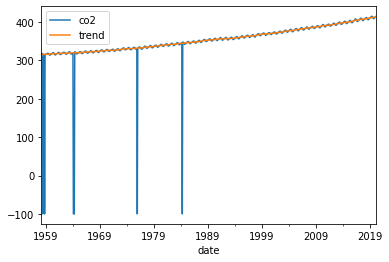

In [96]:
# YOUR CODE HERE (1 line)
df.plot() # missing data shown as -100

changing missing values to None

In [97]:
# YOUR CODE HERE (1 line)
df= df.replace(-99.99, np.nan) # since interpolate() functions fills NaN values, I replaced np.nan rather than None

intepolating missing values

In [98]:
# YOUR CODE HERE (1 line)
df.interpolate(inplace=True)

Plotting the data again

<AxesSubplot:xlabel='date'>

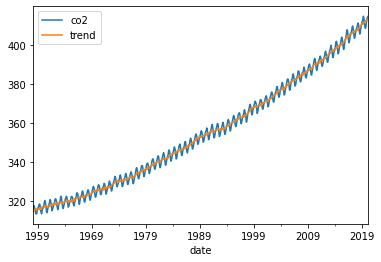

In [99]:
# YOUR CODE HERE (1 line)
df.plot() # yes, it's solved

Saving the above plot as qsn1.png

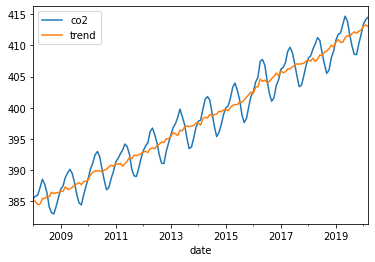

In [100]:
# YOUR CODE HERE (1 line)
df['2008':].plot().figure.savefig("qsn1.png")

# Question 2 - Fit a curve

Creating float_time column

In [101]:
# YOUR CODE HERE (1 line)
df['float_time'] = [round(x,2) for x in (df.index.year + (df.index.month)/12)]
df

,co2,trend,float_time
date,,,
1958-03-01,315.71,314.62,1958.25
1958-04-01,317.45,315.29,1958.33
1958-05-01,317.50,314.71,1958.42
1958-06-01,316.68,314.85,1958.50
1958-07-01,315.86,314.98,1958.58
...,...,...,...
2019-11-01,410.27,412.27,2019.92
2019-12-01,411.76,412.44,2020.00
2020-01-01,413.40,413.08,2020.08


Creating a function to represent the curve which fits this curve to the trend column in the dataset

In [102]:
# YOUR CODE HERE (2 lines)
def represent_curve(t,a=261,b=20.1,c= 0.01685):
    return a + b* np.exp(c*(t-1900))

Importing scipy optimize library

In [103]:
import scipy.optimize as opt

Plotting function's curve and trend column to find better fit

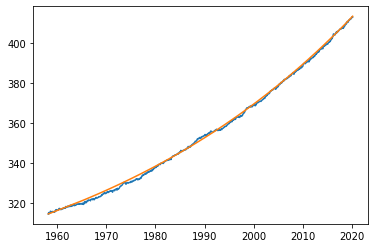

In [104]:
# YOUR CODE HERE (1 line)
plt.plot(df.index, df['trend'],represent_curve(df['float_time'],261,20.1, 0.01685))

Creating a new column called curve_fit

In [105]:
# YOUR CODE HERE (1 line)
df['curve_fit'] = represent_curve(df['float_time'])

Save the plot as qsn2.png

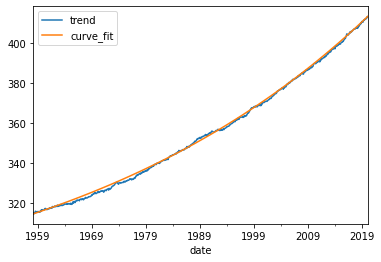

In [106]:
df[['trend','curve_fit']].plot().figure.savefig("qsn2.png")

# Question 3 - Make a prediction

Finding the date that the curve cross the 500ppm threshold mark

In [107]:
# YOUR CODE HERE (1 line)
cross_year = round(opt.fsolve(lambda t: represent_curve(t) - 500 ,1)[0],2)
cross_year

2046.93

plotting the curve_fit until 500ppm and actual trend, then save it as qsn3.png

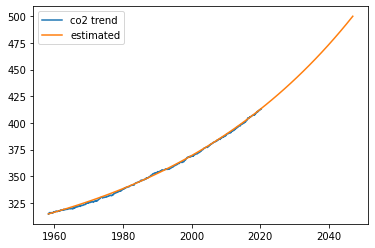

In [108]:
# YOUR CODE HERE (~4 lines)
t= np.linspace(df['float_time'][0],cross_year)
plt.plot(df['float_time'],df['trend'],t,represent_curve(t))
plt.legend(['co2 trend','estimated'])
plt.savefig('qsn3.png')

# Question 4 - Explain the variation

Importing dataset

In [109]:
oni_df = pd.read_csv('http://web.stanford.edu/class/cme193/uploads/oni.ascii.txt', 
                  delim_whitespace=True)

oni_df

,SEAS,YR,TOTAL,ANOM
0,DJF,1950,24.72,-1.53
1,JFM,1950,25.17,-1.34
2,FMA,1950,25.75,-1.16
3,MAM,1950,26.12,-1.18
4,AMJ,1950,26.32,-1.07
...,...,...,...,...
858,JJA,2021,26.90,-0.39
859,JAS,2021,26.47,-0.49
860,ASO,2021,26.09,-0.67
861,SON,2021,25.90,-0.82


creating co2_variation column

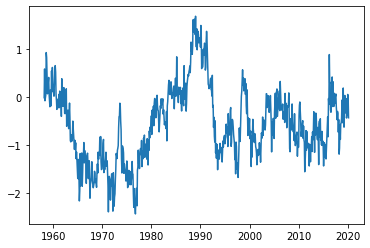

In [110]:
df["co2_variation"] = df["trend"]-df["curve_fit"] 
plt.plot(df["co2_variation"],)

 finding a common set of dates between the datasets

In [111]:
df_sub =df # 1958-03-01 to 2020-03-01
oni_df_sub= oni_df[98:843] # 98-842 => FMA 1958 FMA 2020

The below output should show the same start and end dates, if they are properly aligned

In [112]:
print(oni_df_sub[['SEAS','YR']].iloc[[0,-1]])
print(df_sub.index[[0,-1]])

    SEAS    YR
98   FMA  1958
842  FMA  2020
DatetimeIndex(['1958-03-01', '2020-03-01'], dtype='datetime64[ns]', name='date', freq=None)


We can now extract the values into numpy arrays to use for regression

In [113]:
y = df_sub['co2_variation'].values
x = oni_df_sub['ANOM'].values

Writing a function called featurize(x,d)

In [116]:
def featurize(x,d):
    result = [([round(x[i-j],1) for j in range(d)]) for i in range(d-1,len(x))]
    return result
inp1 = 0.1 * np.arange(10)
print("Input = ",inp1,"\n")
print("Output = \n",featurize(inp1,4), "\n")

Input =  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] 

Output = 
 [[0.3, 0.2, 0.1, 0.0], [0.4, 0.3, 0.2, 0.1], [0.5, 0.4, 0.3, 0.2], [0.6, 0.5, 0.4, 0.3], [0.7, 0.6, 0.5, 0.4], [0.8, 0.7, 0.6, 0.5], [0.9, 0.8, 0.7, 0.6]] 



linear regression model

In [117]:
from sklearn.linear_model import LinearRegression
featurized_x= featurize(x,12)[:-1] 
truncated_y = y[12:]

model = LinearRegression().fit(featurized_x, truncated_y)

compute the Peasrson's R coefficient between the "ONI_regression" and "co2_variation" columns

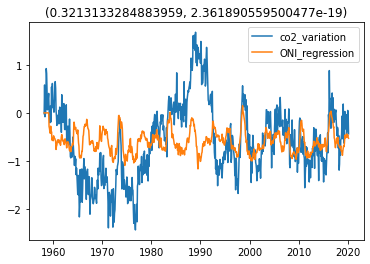

In [118]:
# YOUR CODE HERE 
df_sub['ONI_regression']= np.zeros(len(df_sub))
df_sub['ONI_regression'][12:]=model.predict(featurized_x)
plt.plot(df_sub.index, df_sub['co2_variation'], df_sub['ONI_regression'])
from scipy import stats
title = stats.pearsonr(df_sub['co2_variation'], df_sub['ONI_regression'])
plt.title(title)
plt.legend(['co2_variation','ONI_regression'])

Plotting from 1995 onwards and recompute the pearson coefficient for this time period

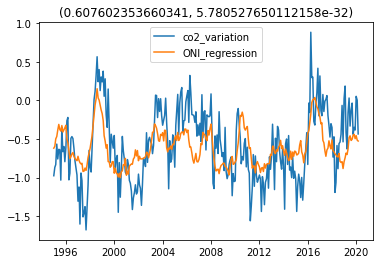

In [119]:
# YOUR CODE HERE 
df_sub2 = df_sub['1995-01-01':'2020-03-01']
plt.plot(df_sub2.index, df_sub2['co2_variation'], df_sub2['ONI_regression'])
title = stats.pearsonr(df_sub2['co2_variation'], df_sub2['ONI_regression'])
plt.title(title)
plt.legend(['co2_variation','ONI_regression'])
plt.savefig('qsn4.png')